# Practice Learning Activity 3

# Define objective here

1. Log in to Google AI Studio at https://aistudio.google.com/welcome

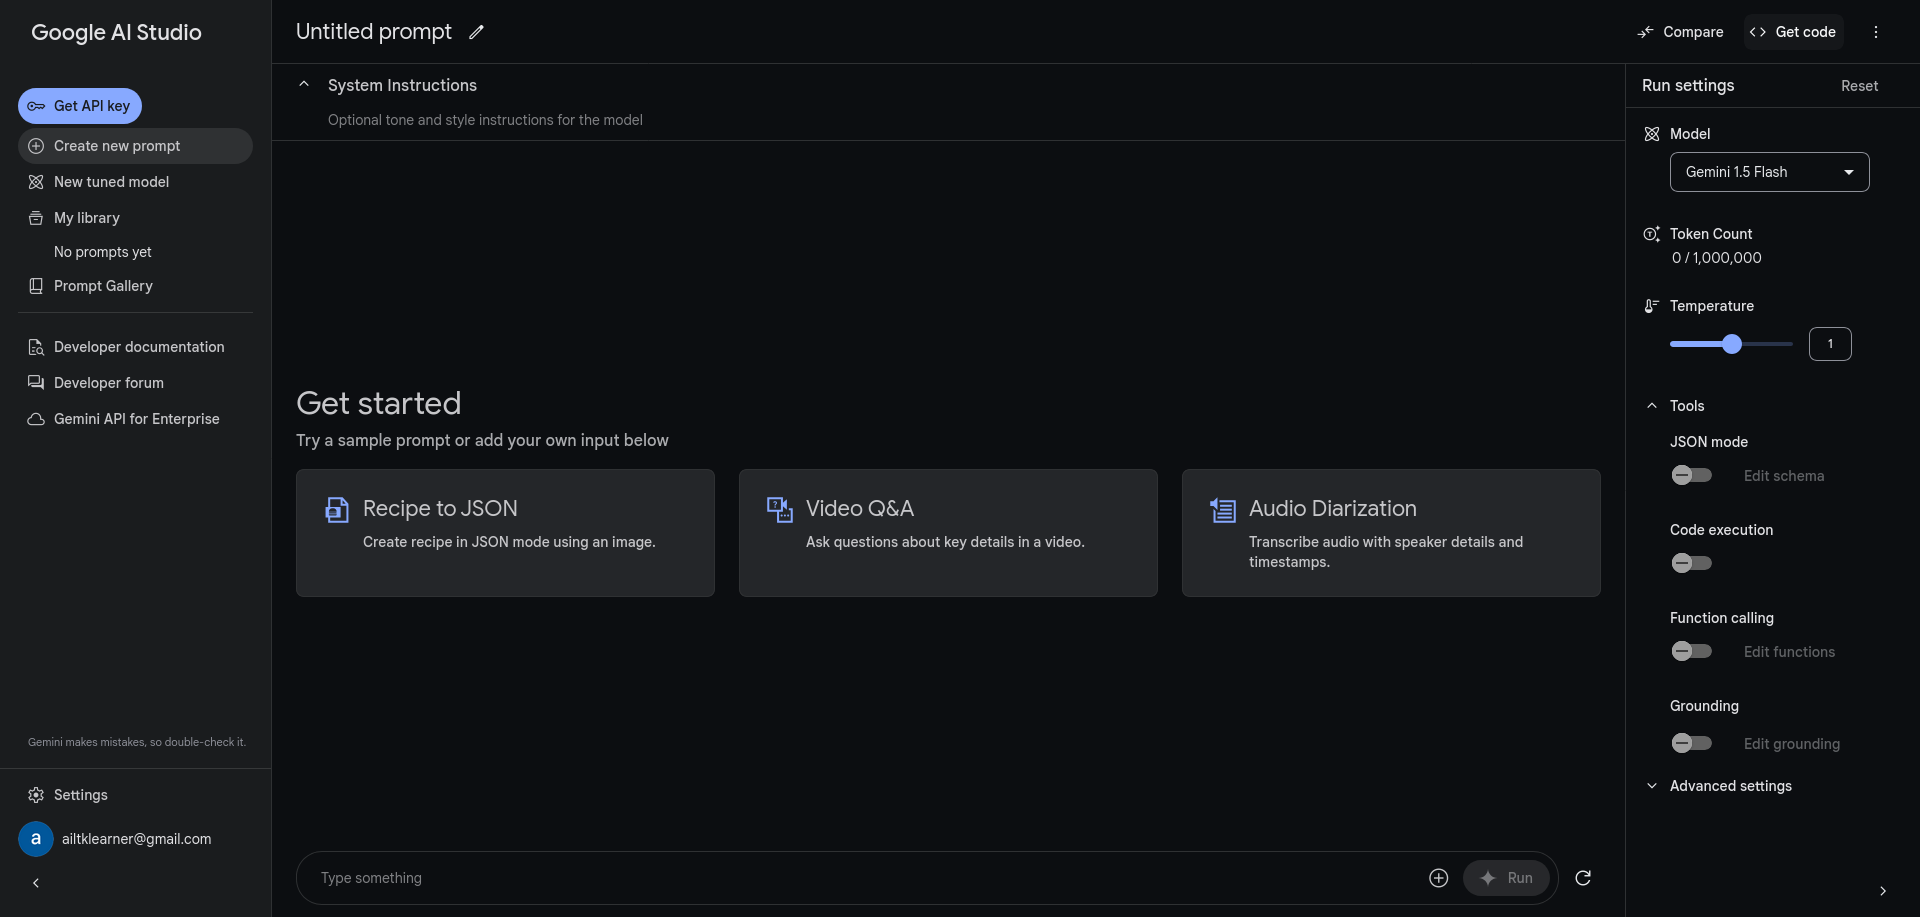

2. s

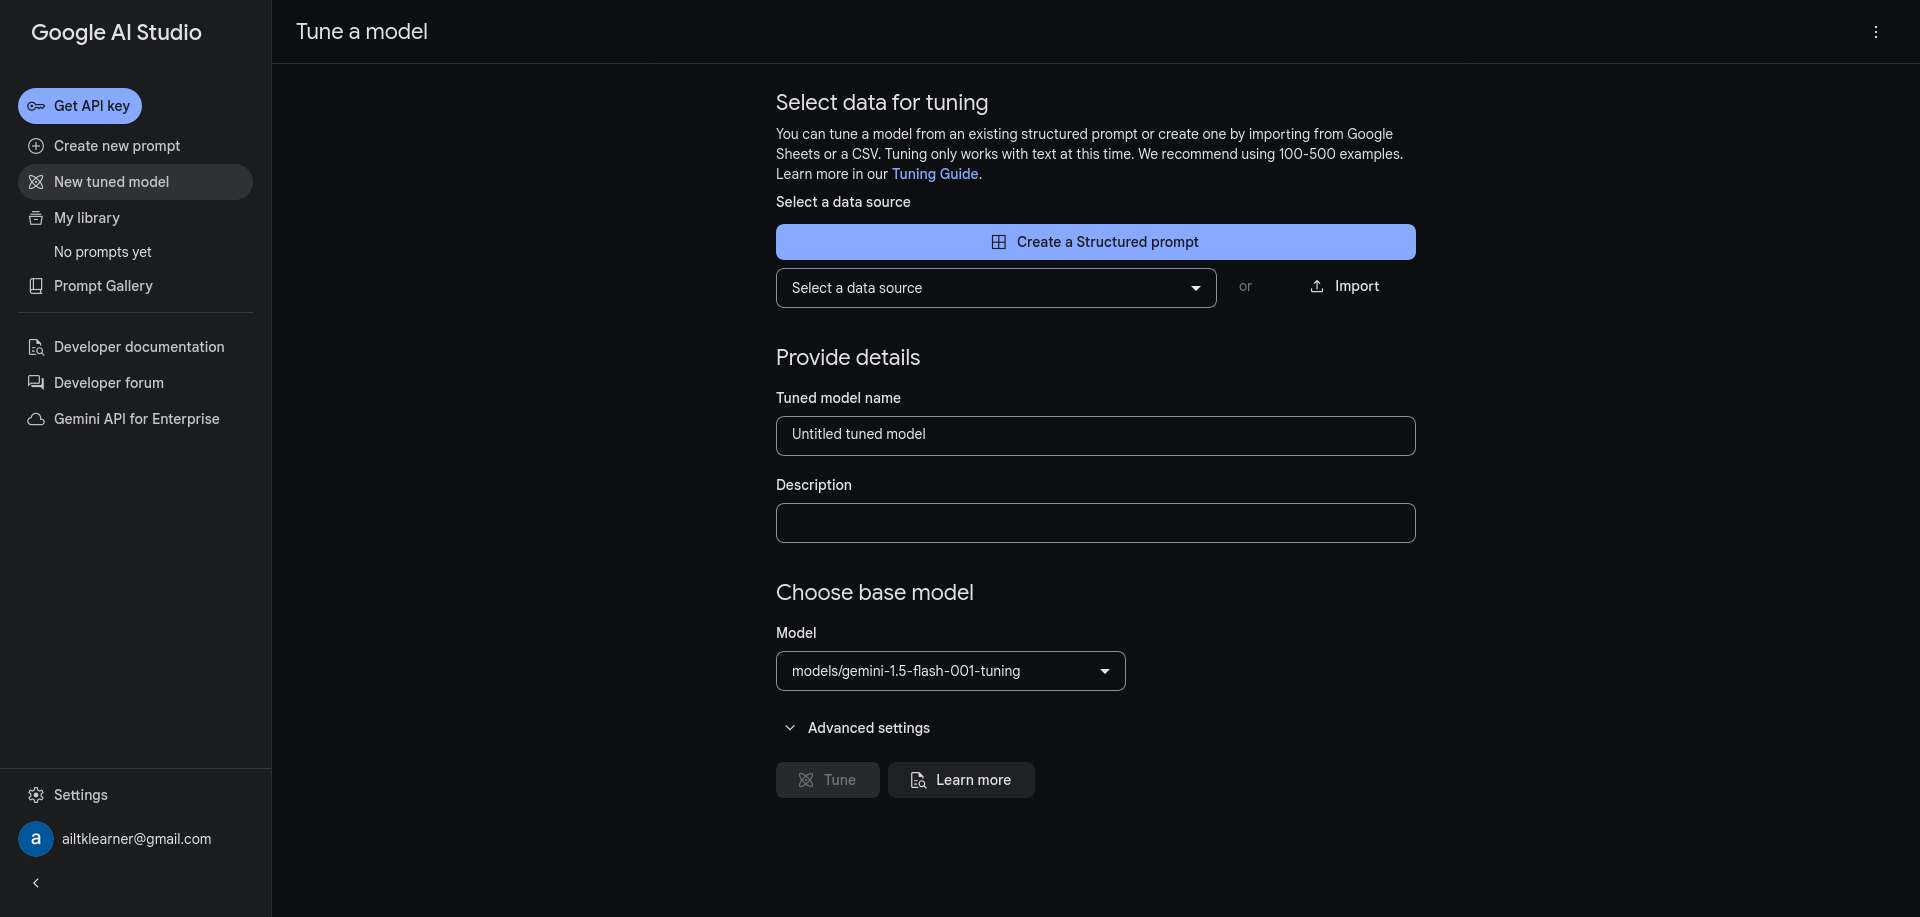

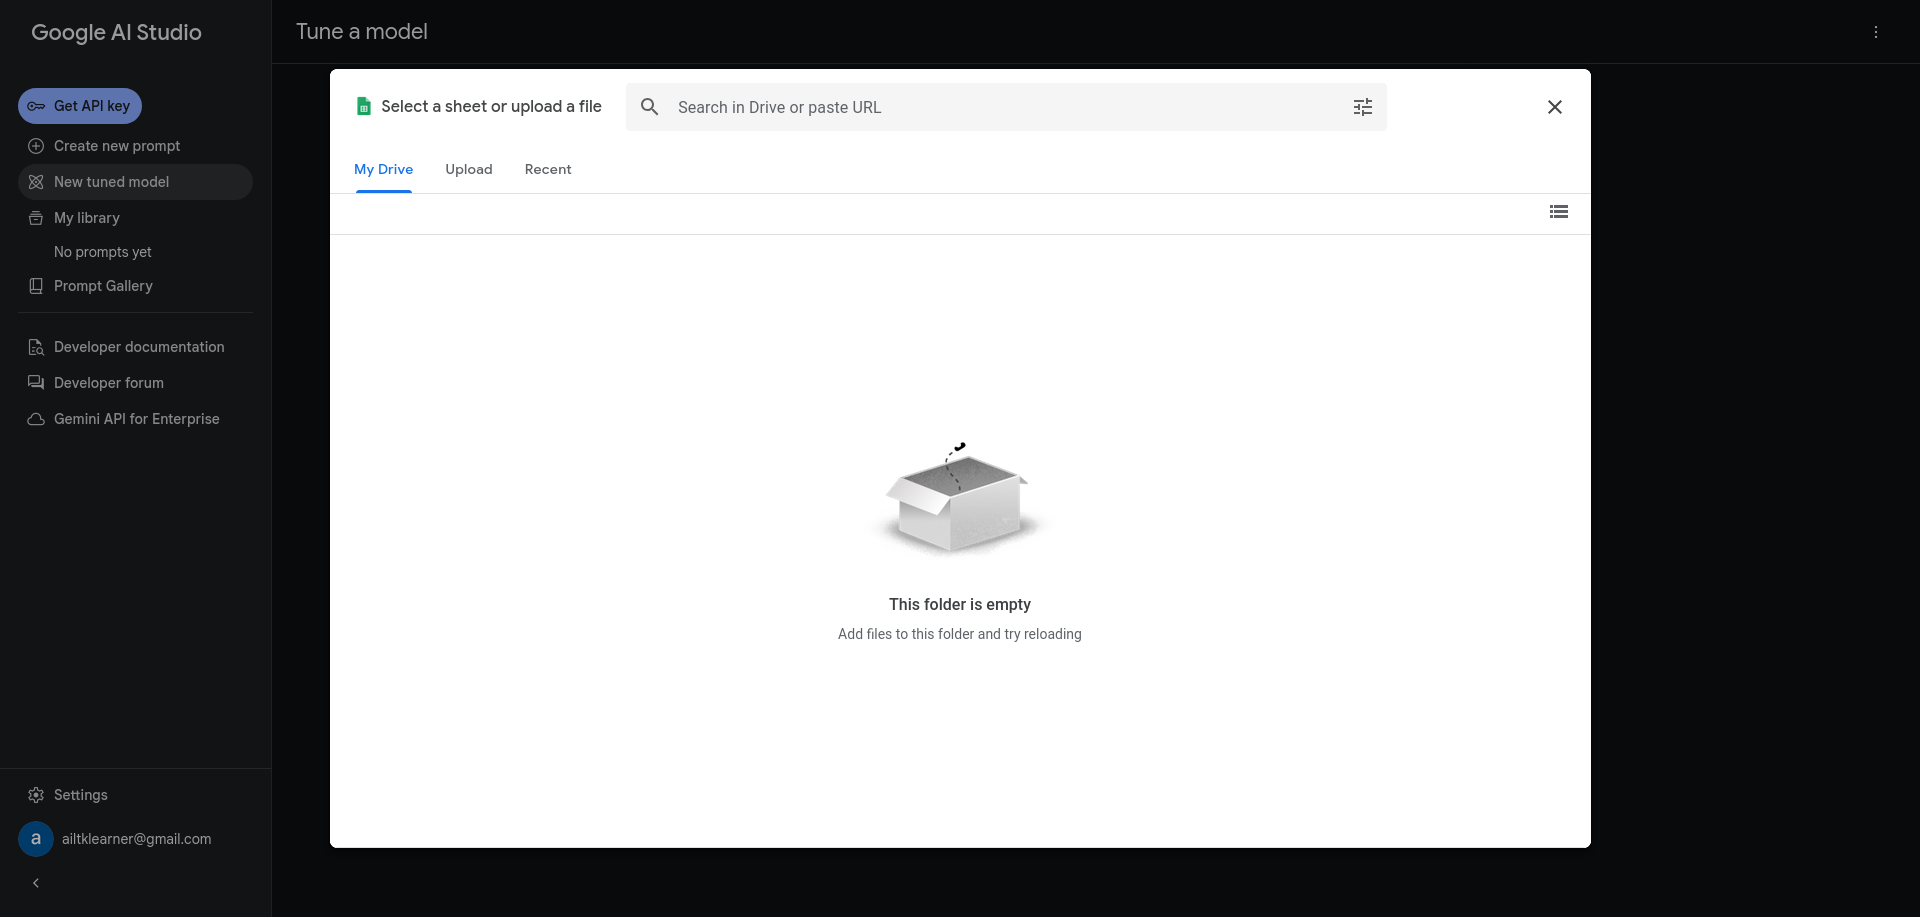

#### Upload outputted file from previous practice-learning-activity

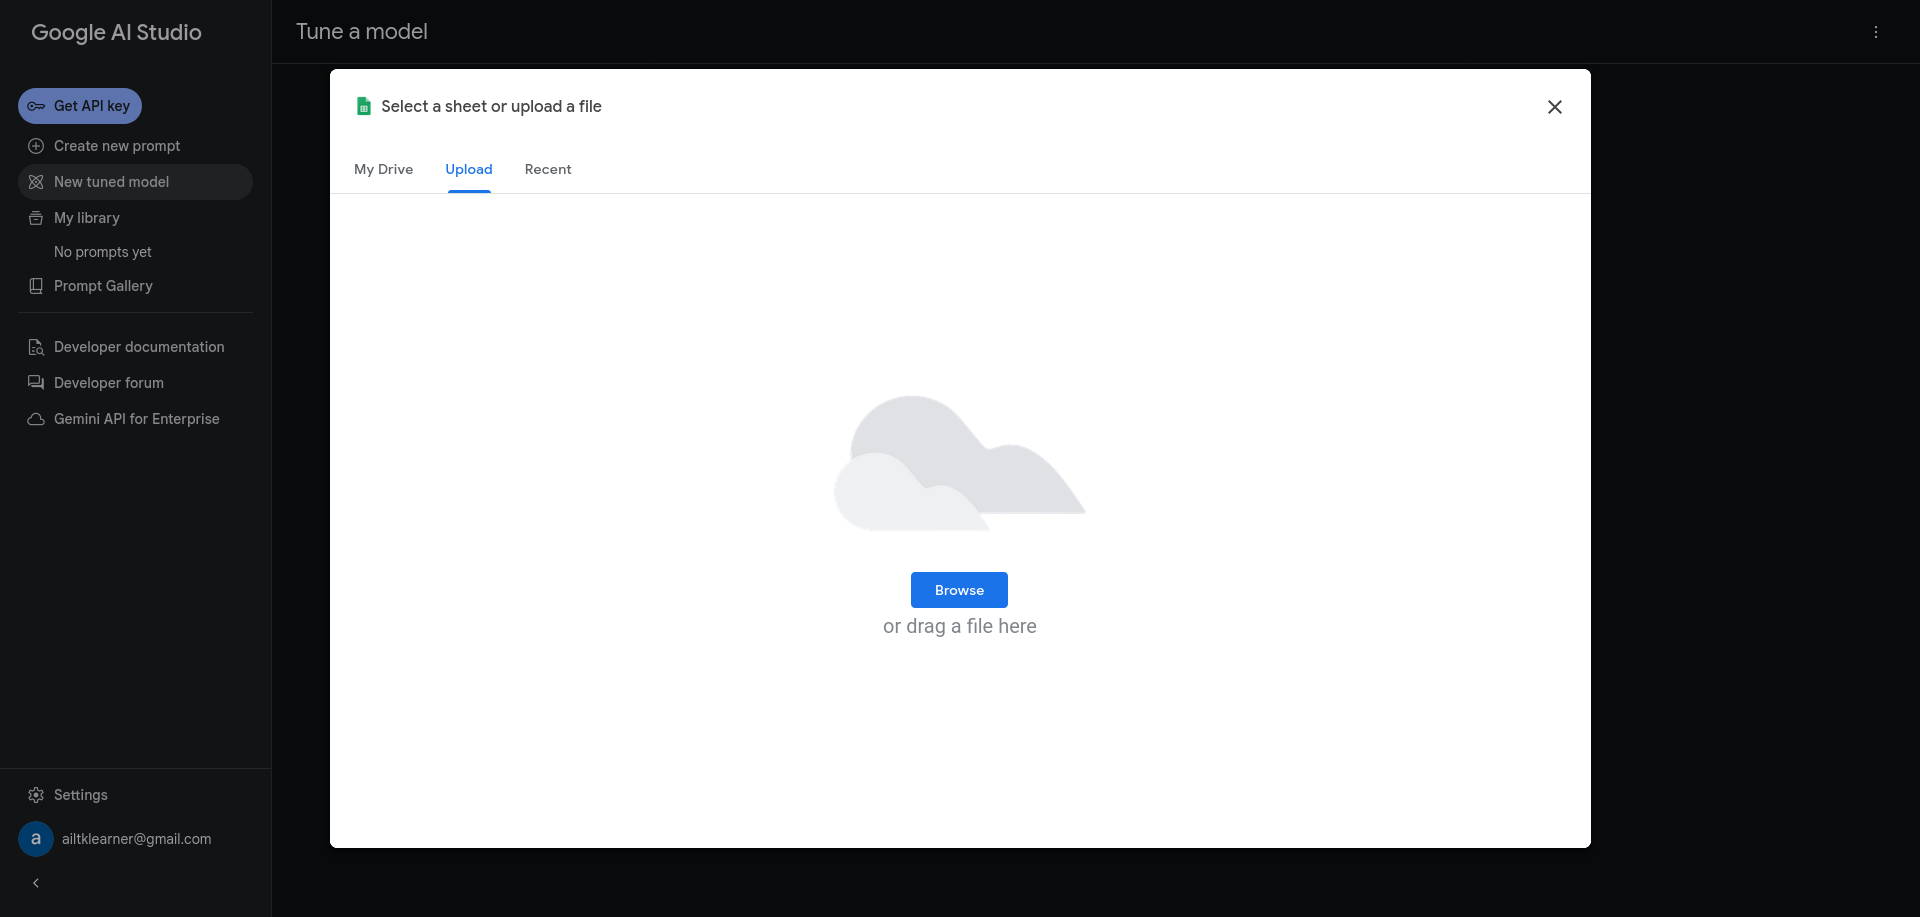

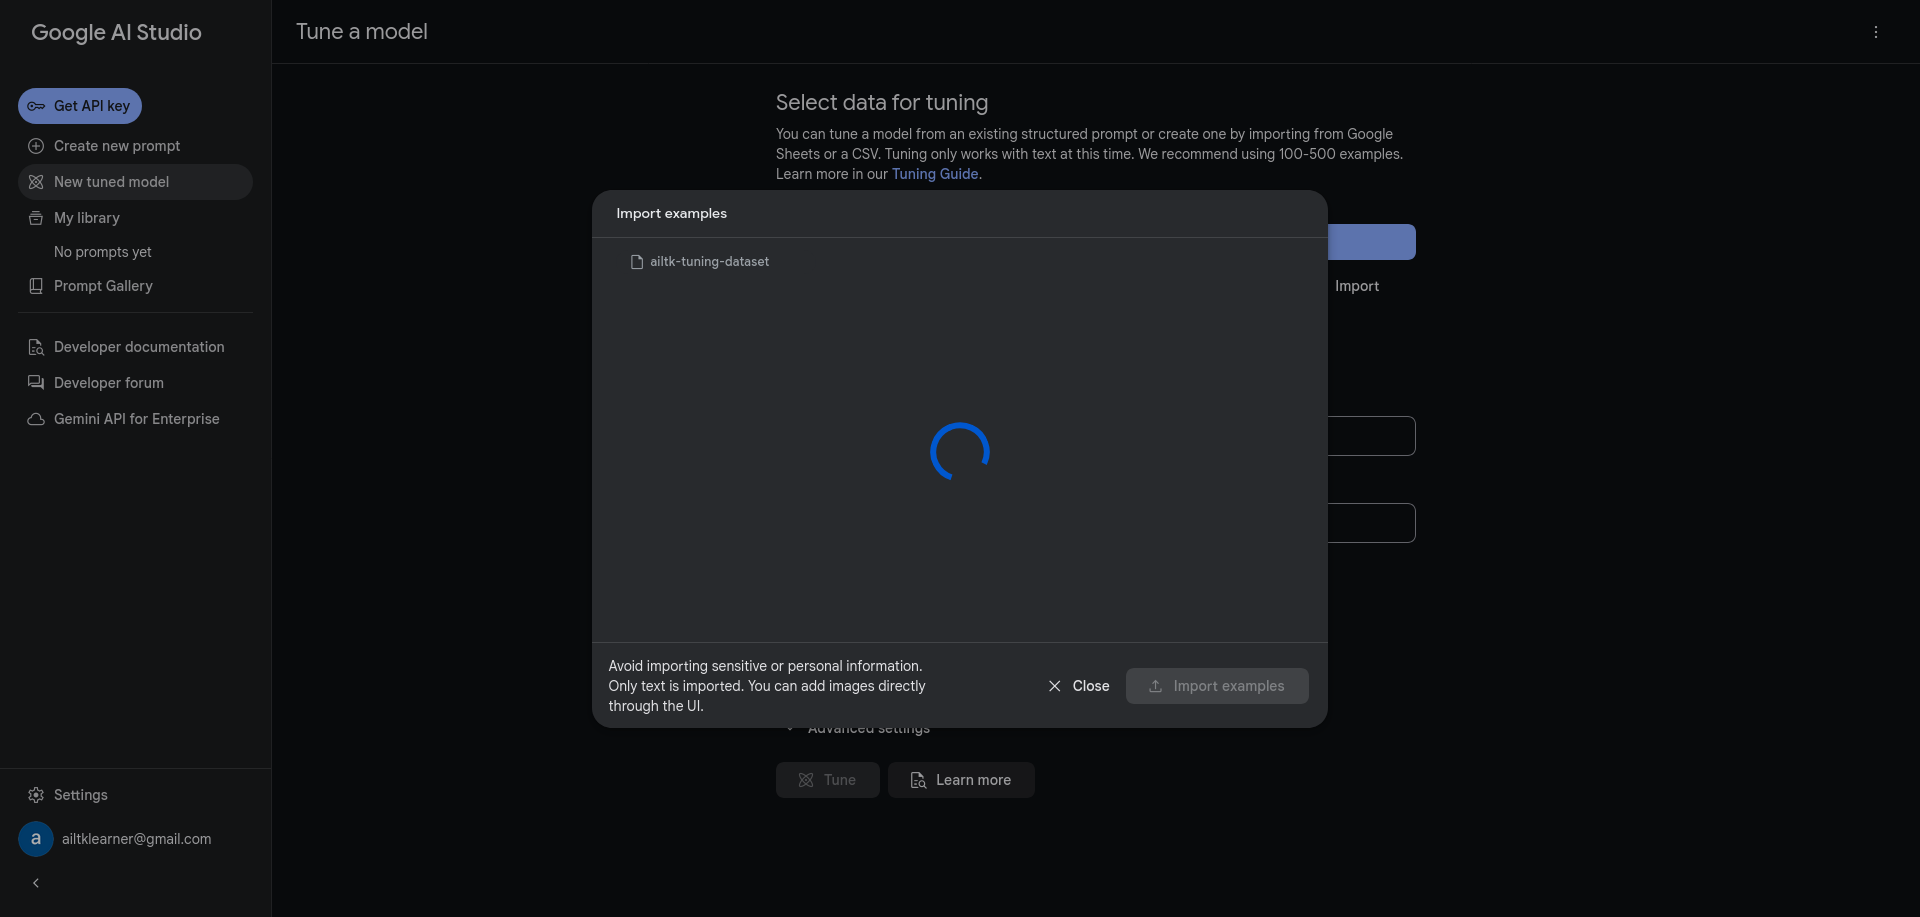

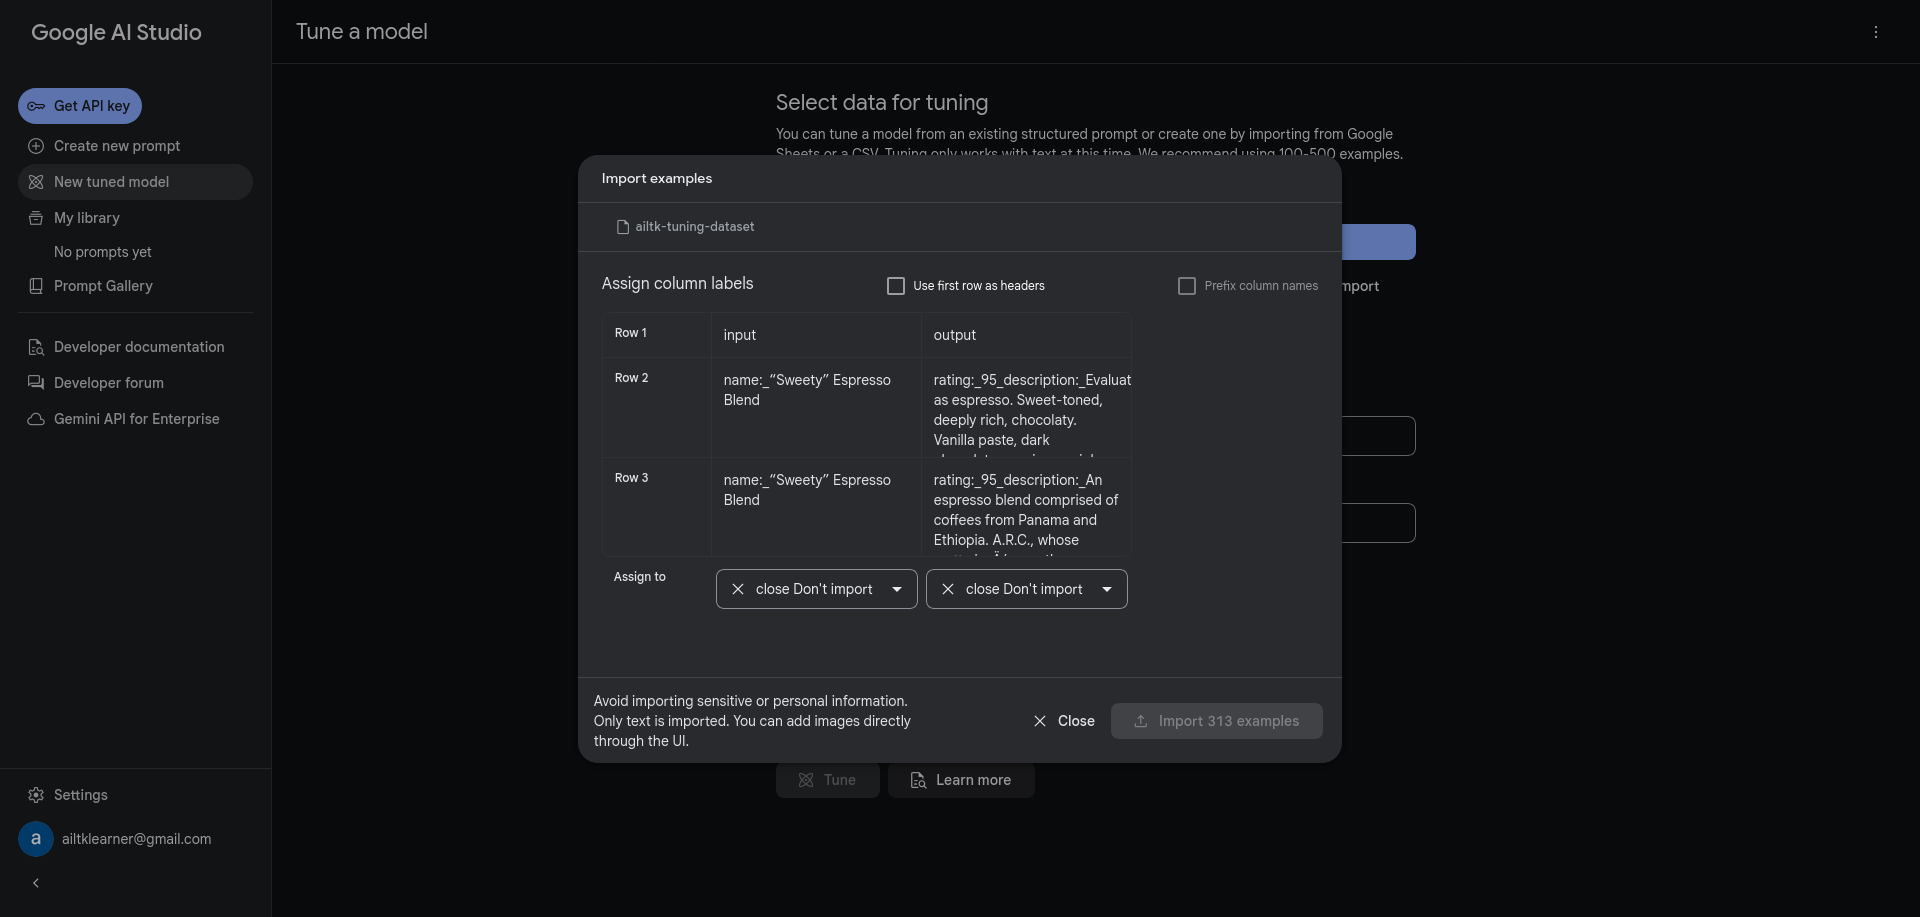

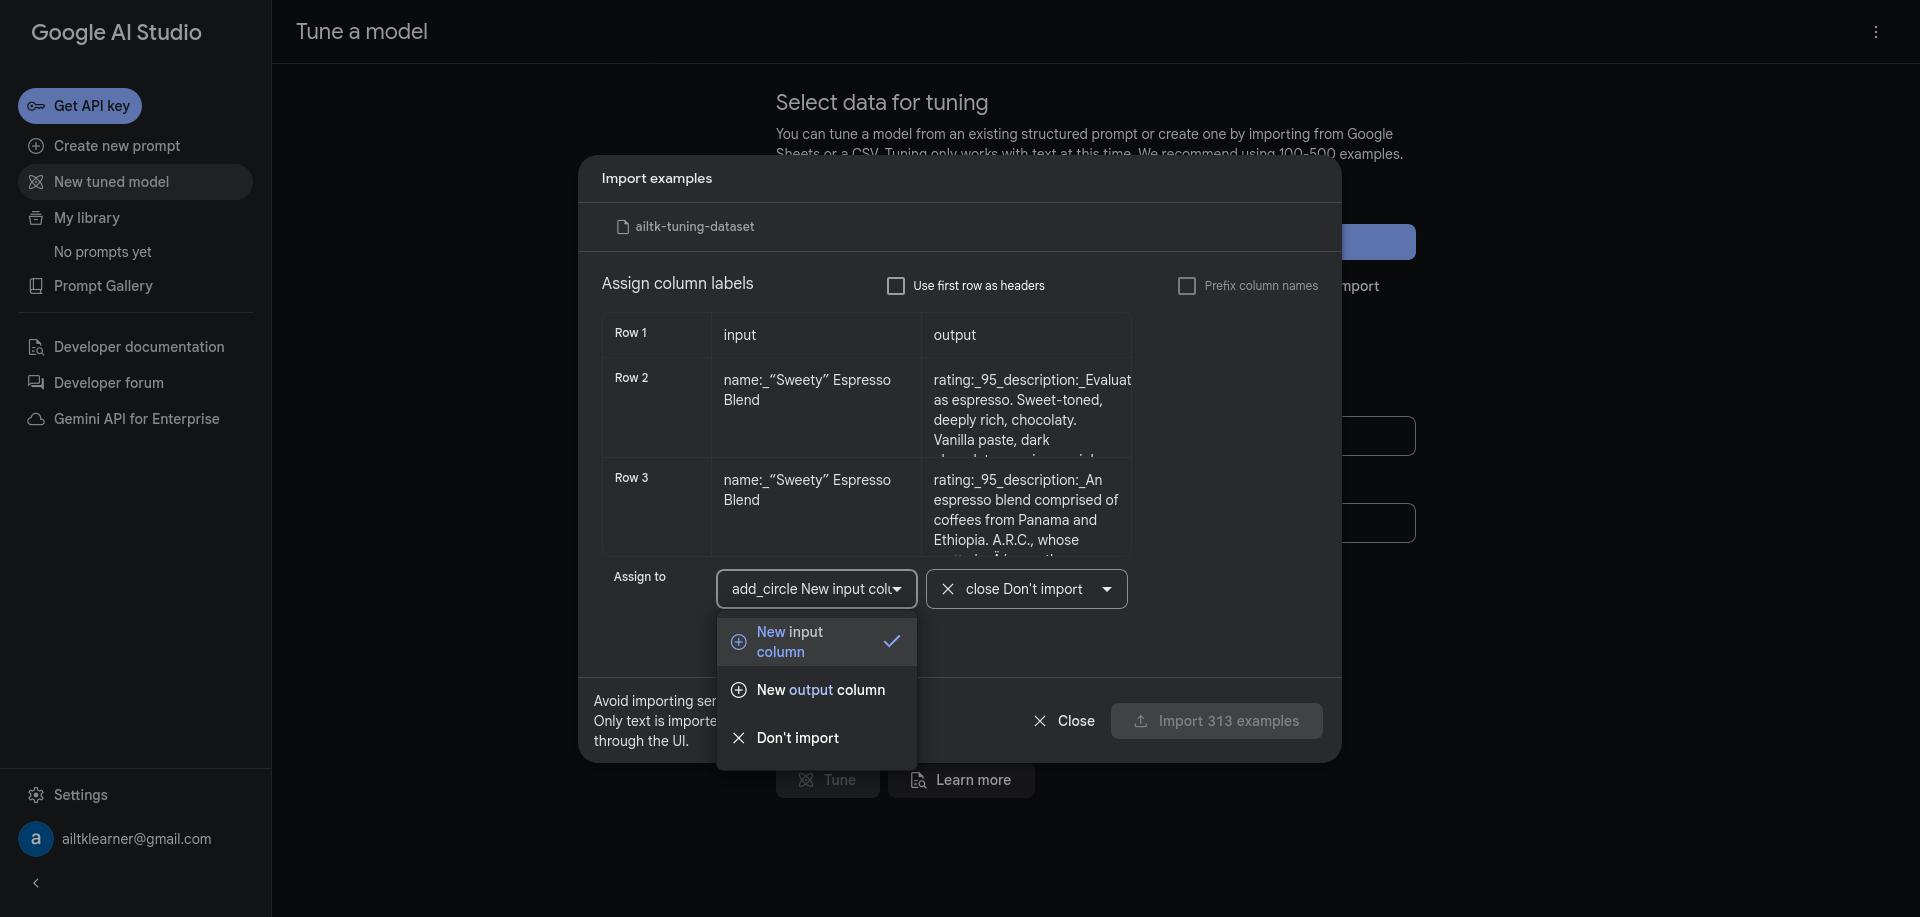

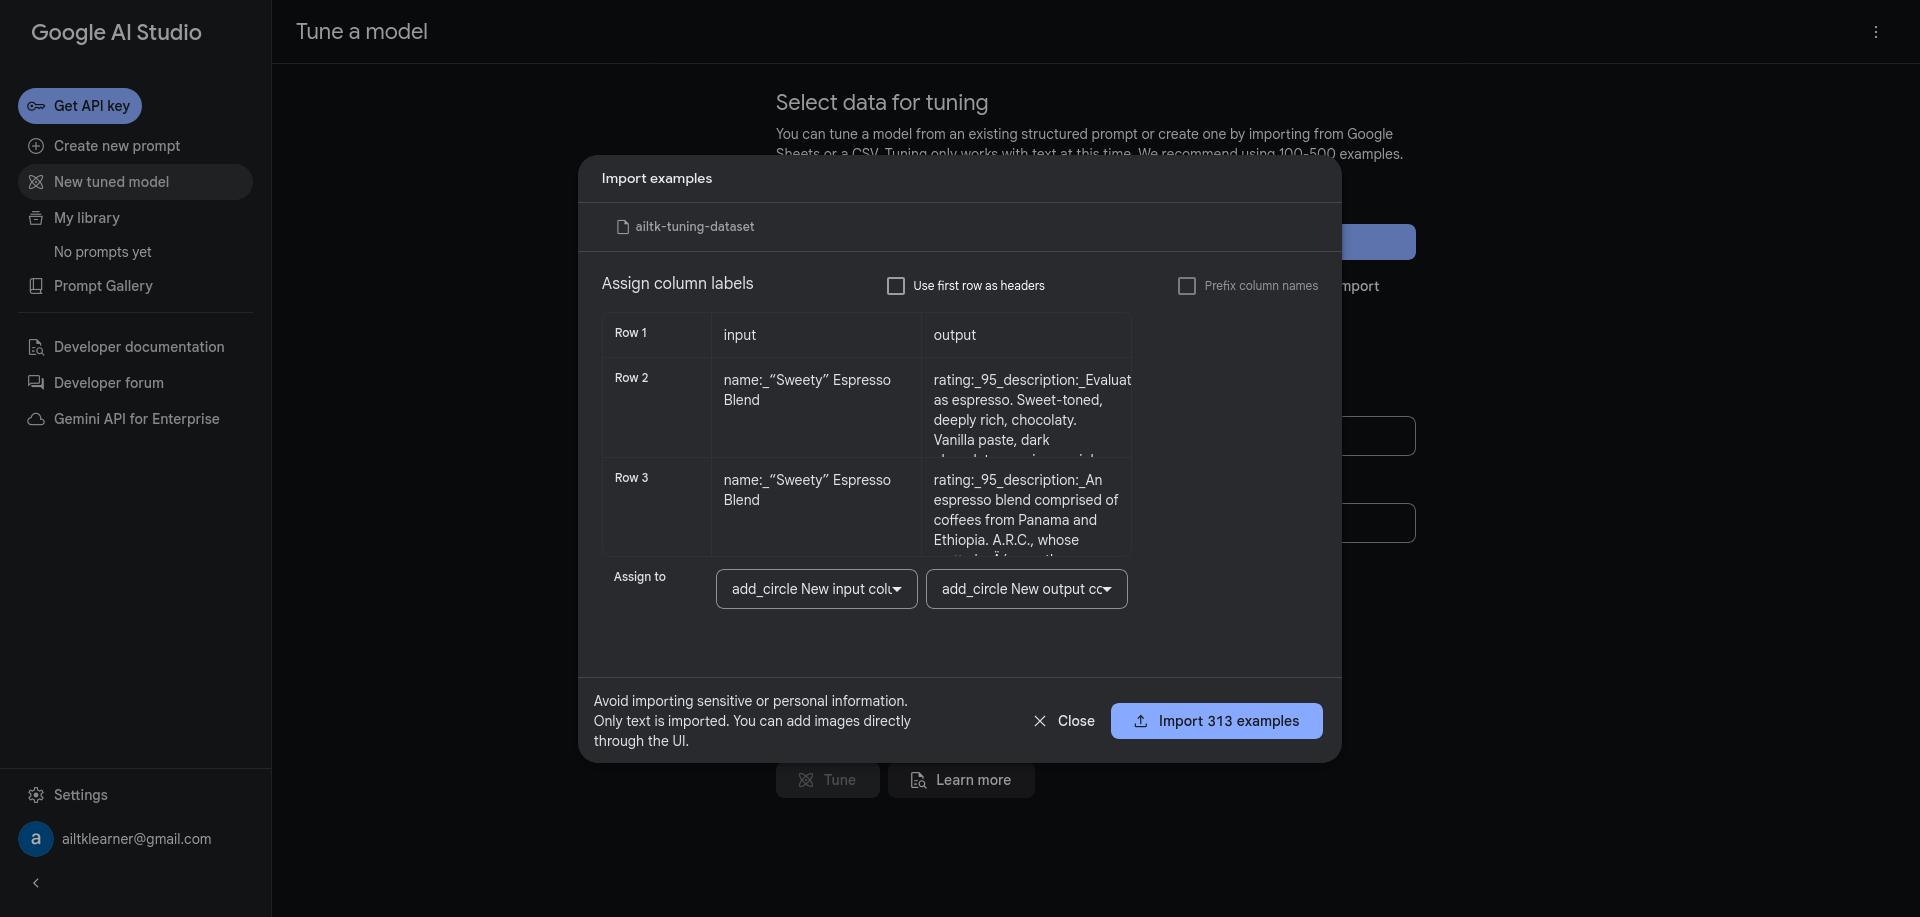

Afterwards click the import button: 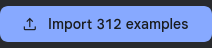

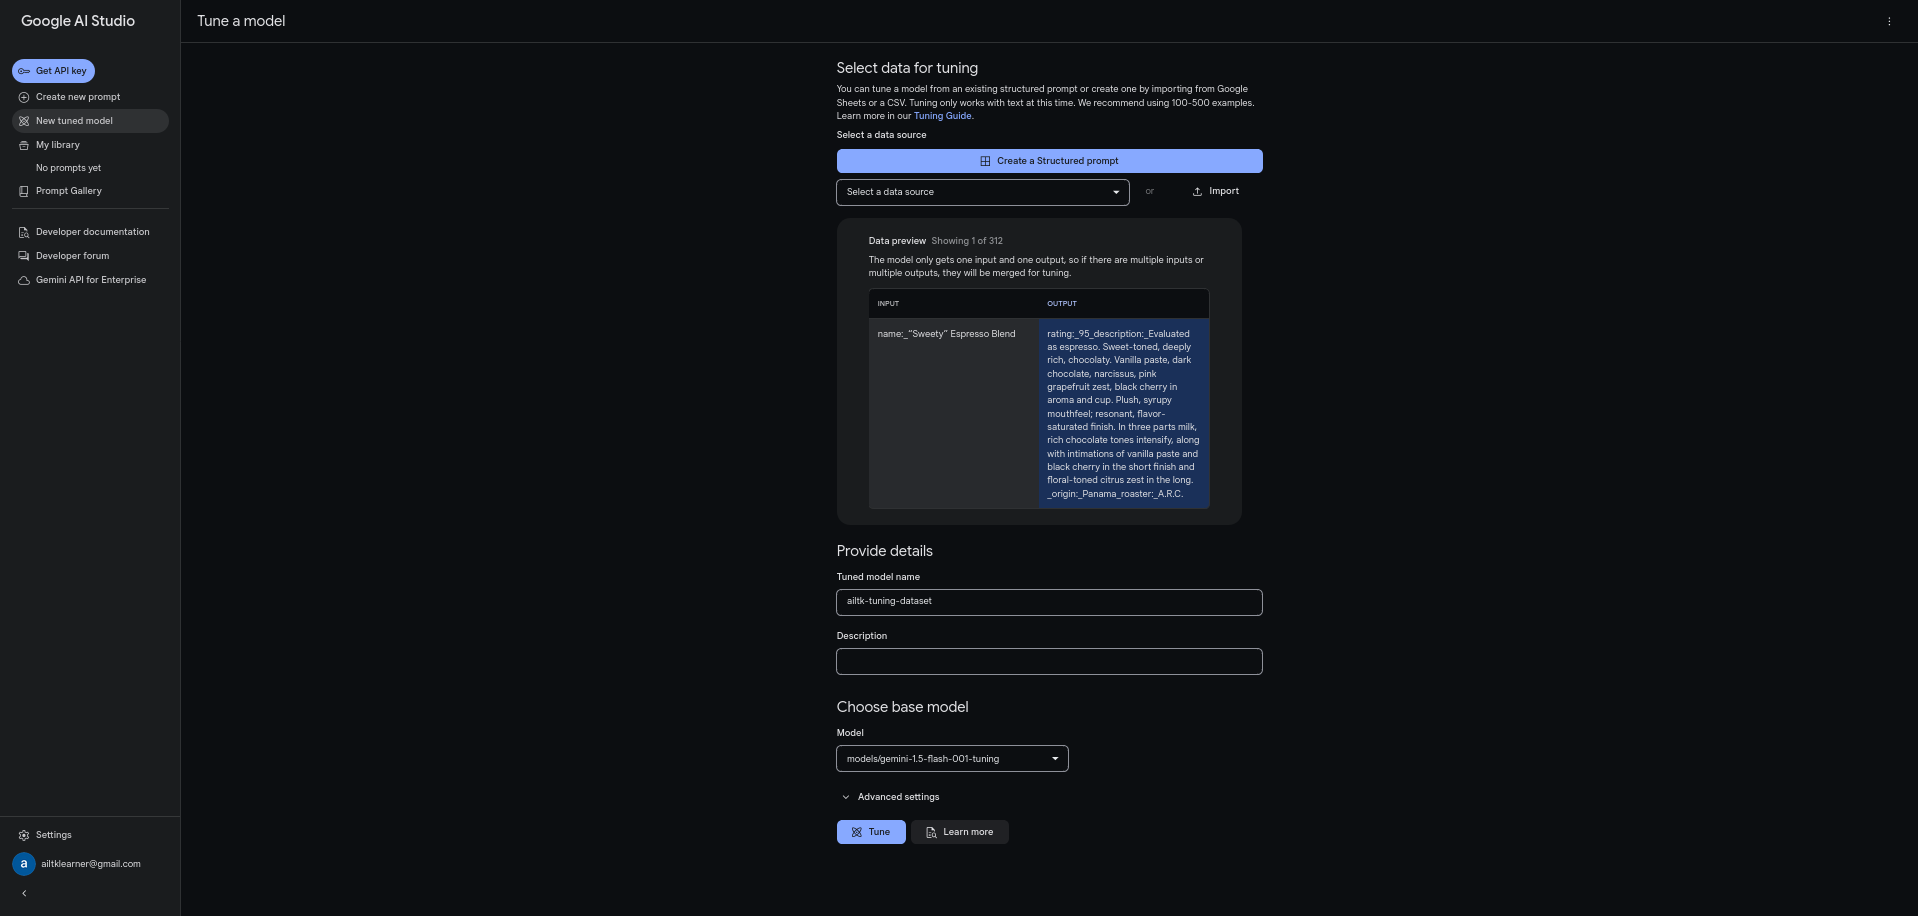

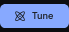

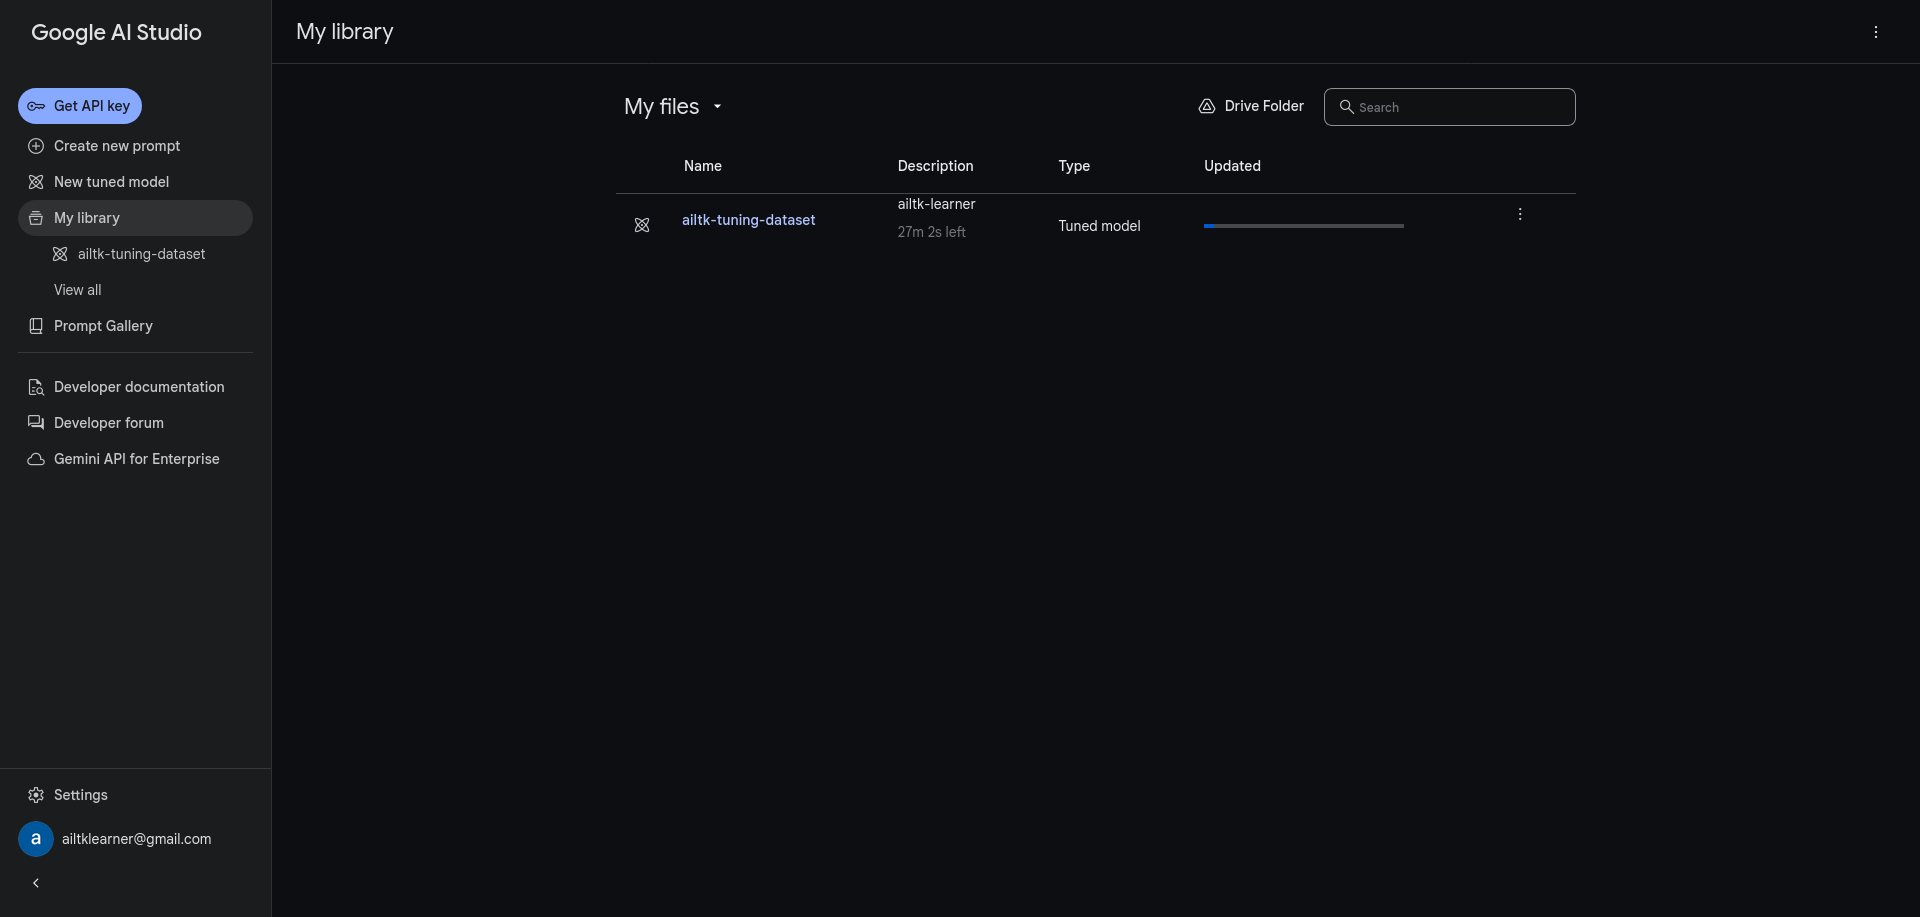

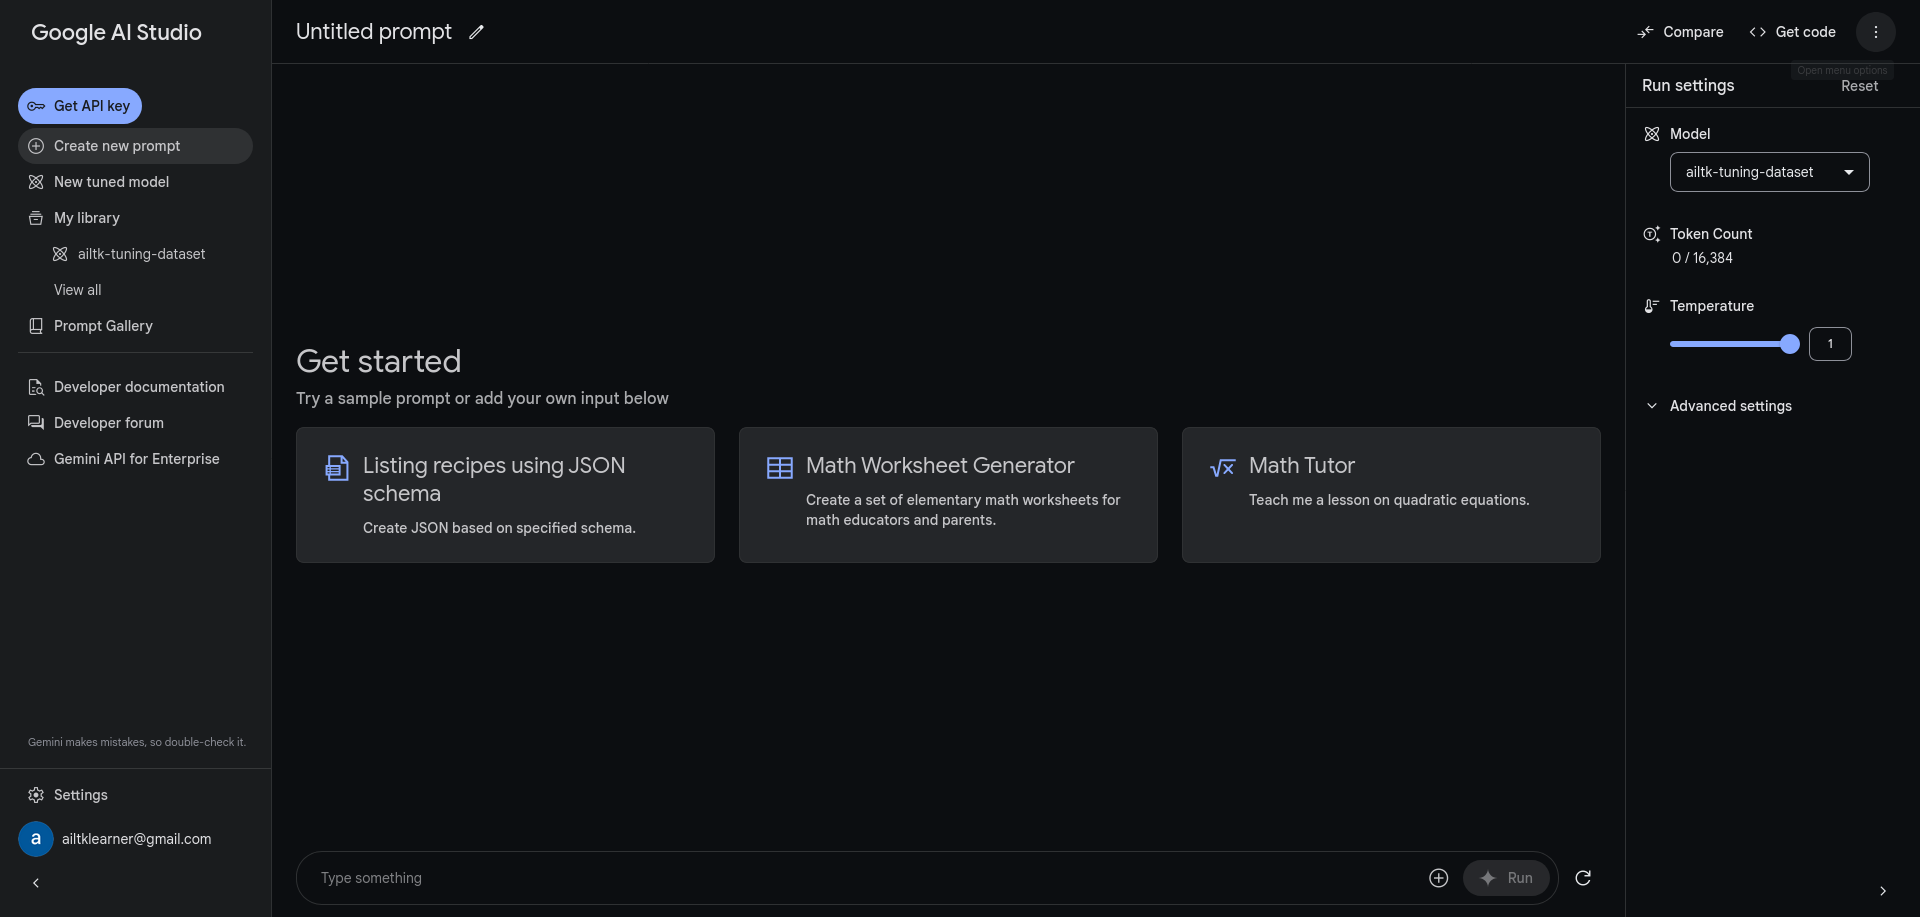

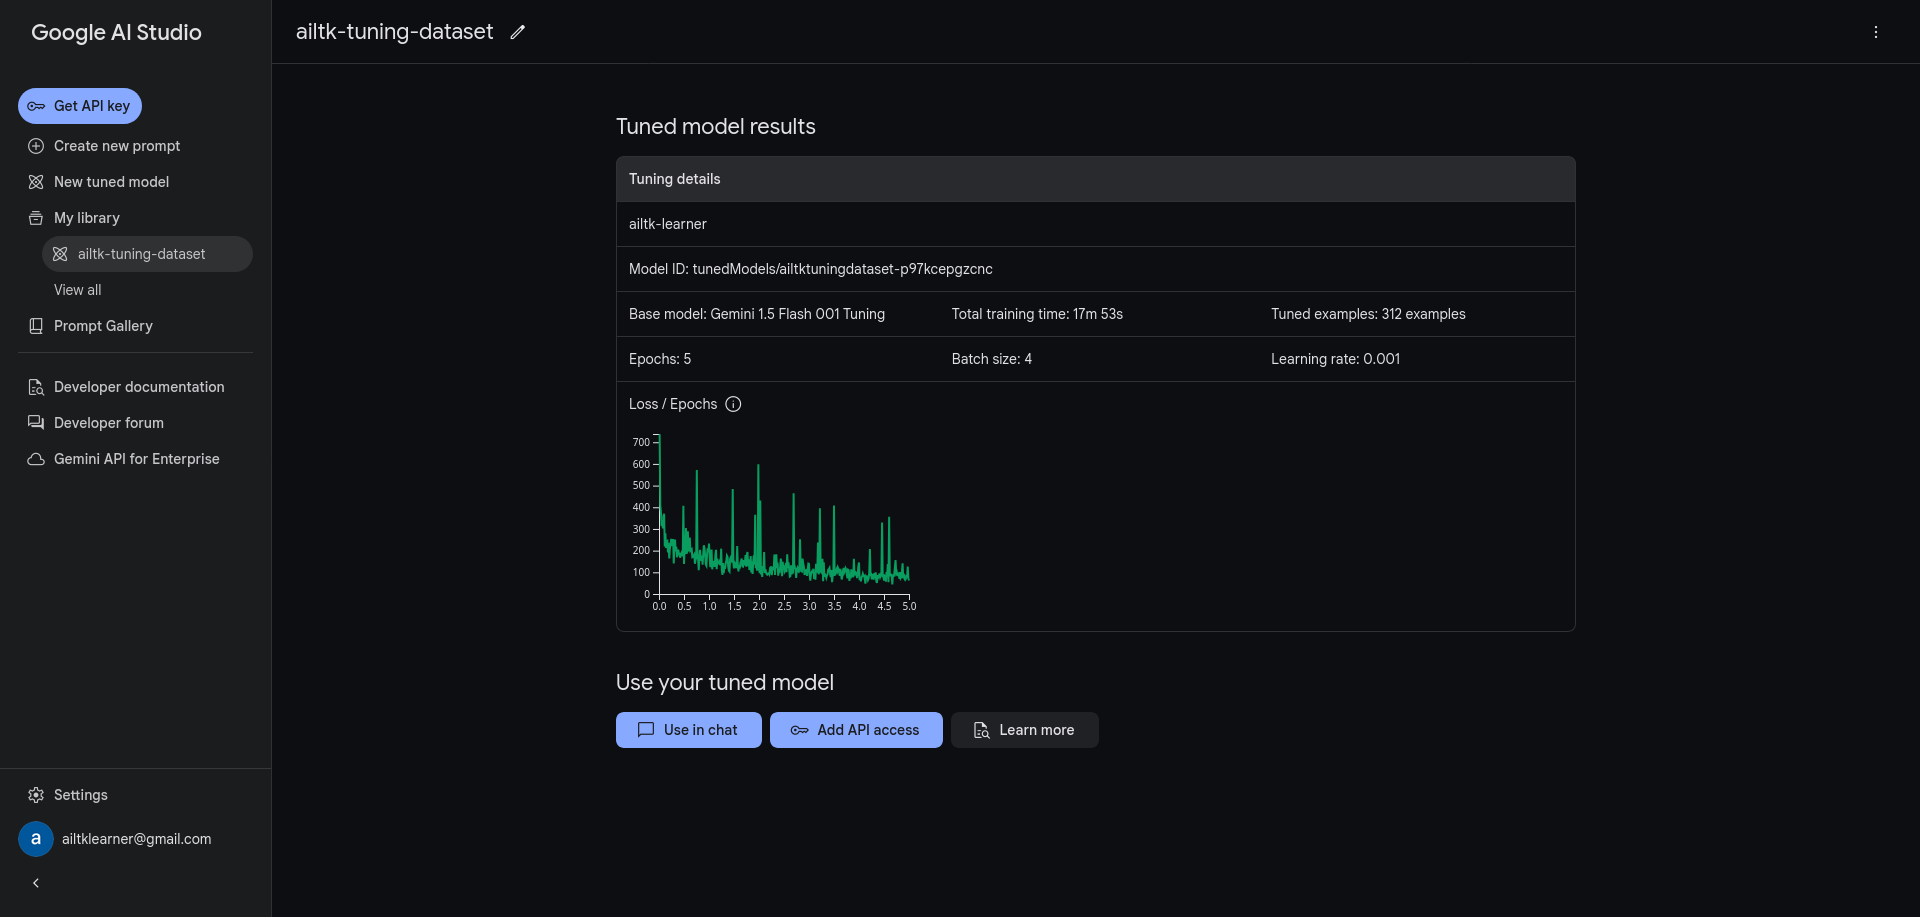

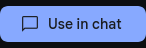

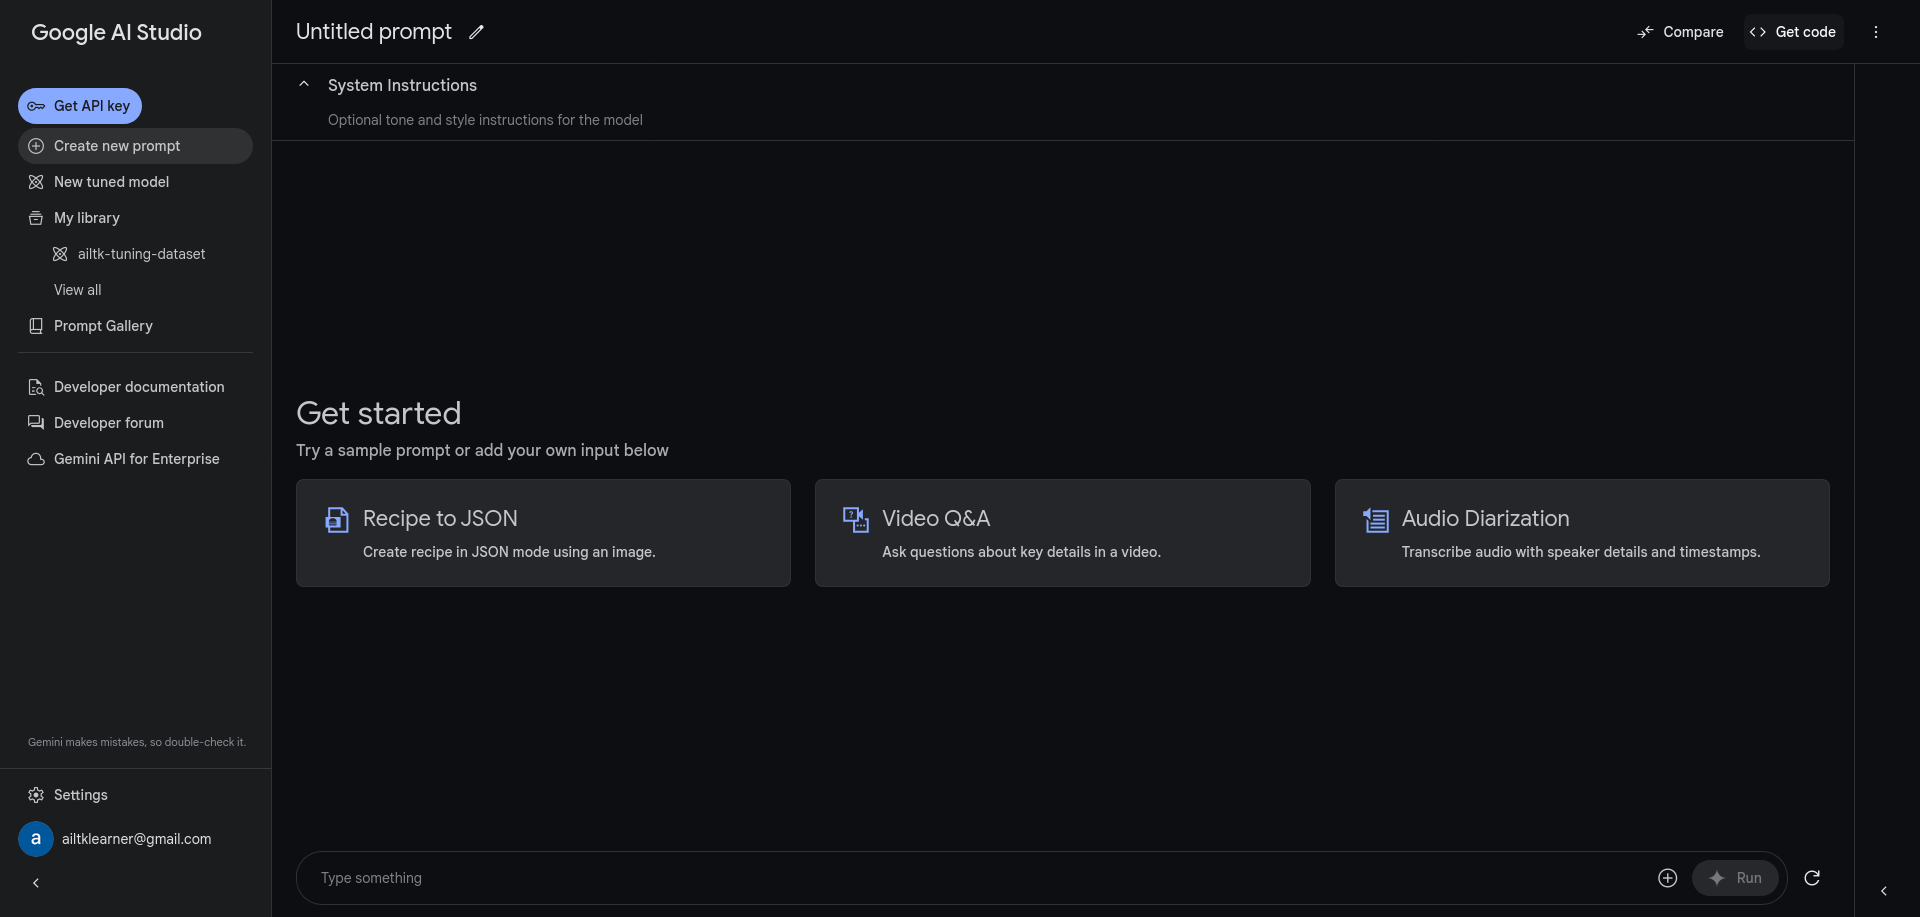

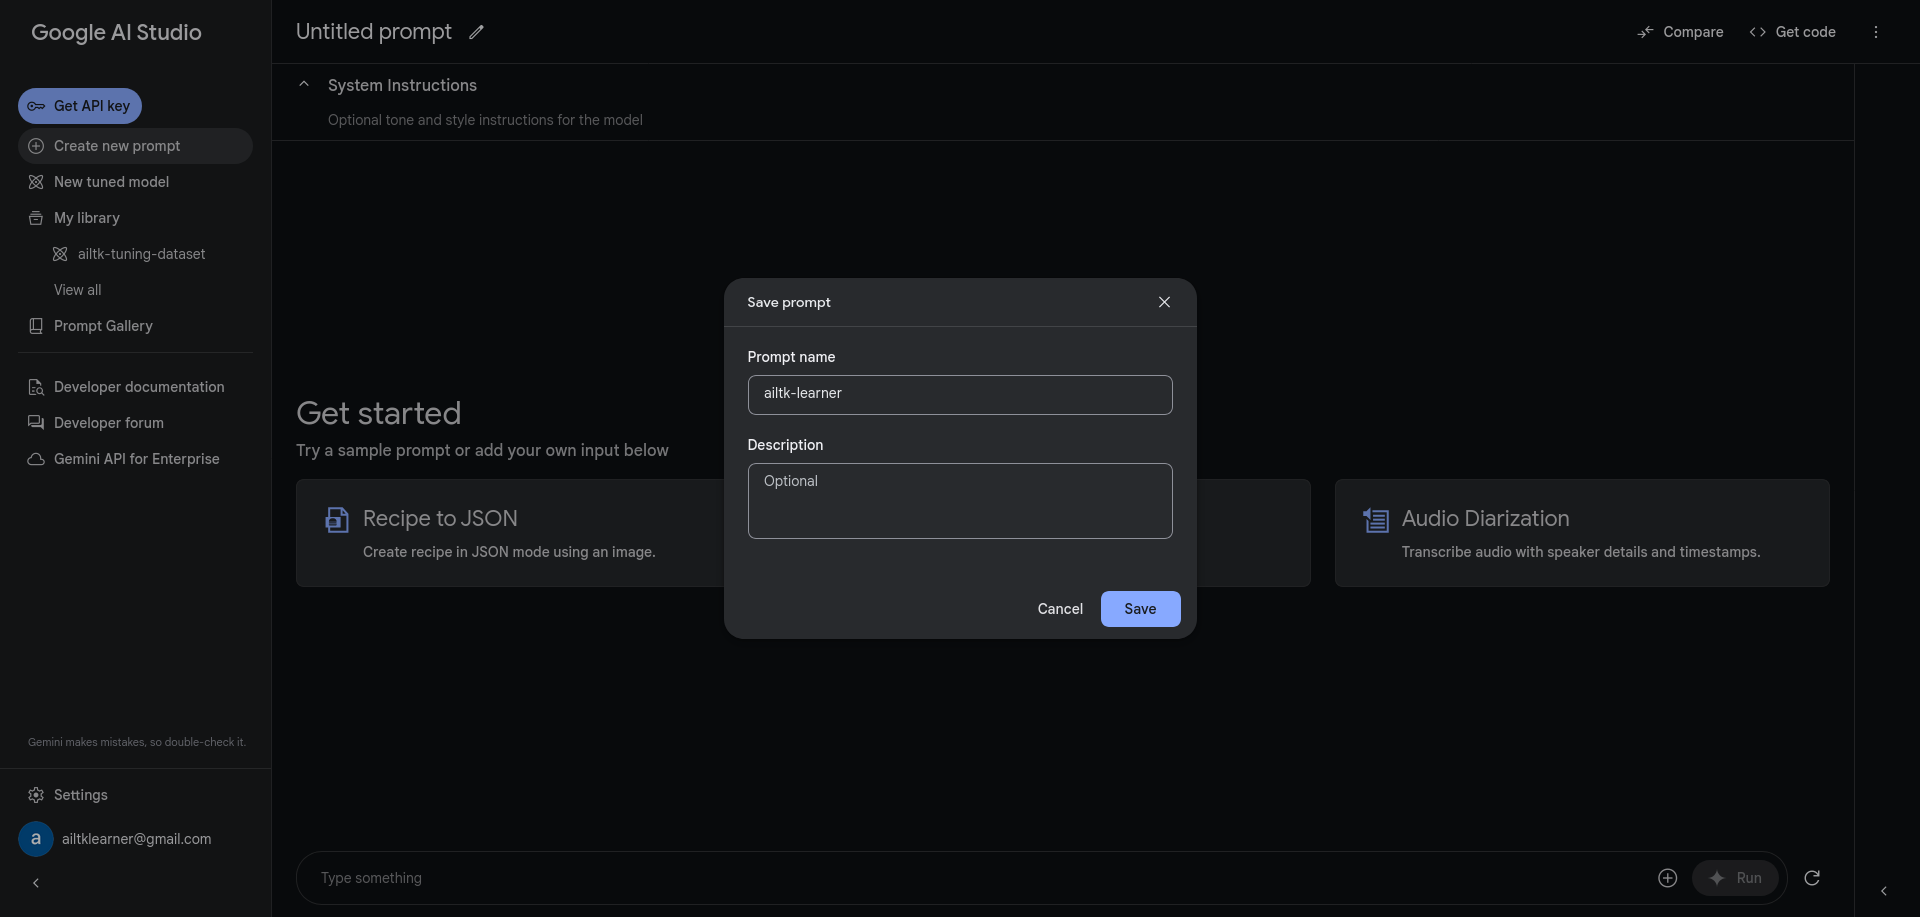

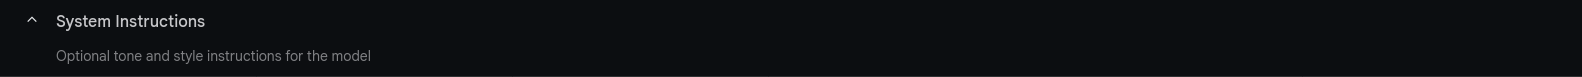